In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import environ
from sqlalchemy import create_engine
from sqlalchemy import Column, Integer, String, Float 
from config import password
engine = create_engine(password)
connection = engine.connect()

In [3]:
#import employees
employees = pd.read_sql("SELECT * FROM employees", connection)

In [4]:
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_data
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [5]:
#import salaries
salary = pd.read_sql("SELECT * FROM salaries", connection)
salary.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [6]:
#import titles
titles = pd.read_sql("SELECT * FROM titles", connection)
titles.head()

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [7]:
#import departments
departments = pd.read_sql("SELECT * FROM departments", connection)

In [8]:
#combining data for charts
combined_data = employees.merge(salary,how="inner",on="emp_no")
combined_data_final = combined_data.merge(titles,how="inner").reset_index()
combined_data_final.columns = combined_data_final.columns.str.strip()

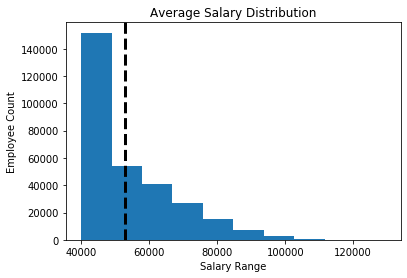

In [9]:
#histogram of avg salaries
plt.hist(combined_data_final['salary'])
plt.axvline(combined_data_final['salary'].mean(), color = 'black', linestyle='dashed', linewidth=3)
plt.xlabel("Salary Range")
plt.ylabel("Employee Count")
plt.title("Average Salary Distribution")
plt.savefig('histogram_averages.png')
plt.show()  


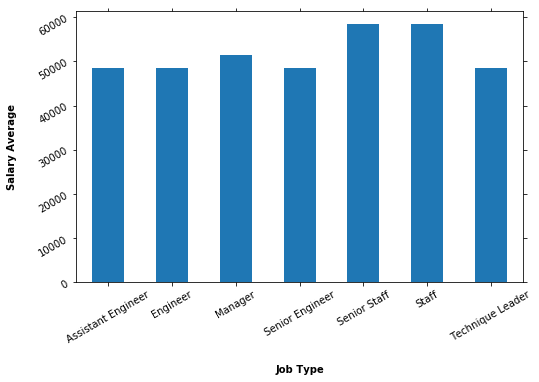

In [10]:
#barplot of avg salary by job type
avg_sal = combined_data_final.groupby(["title"]).mean()["salary"]
ax = avg_sal.plot(kind='bar', figsize=(8, 5))
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on",rotation=30)
ax.set_xlabel("Job Type", labelpad=20, weight='bold', size=10)
ax.set_ylabel("Salary Average", labelpad=20, weight='bold', size=10)
plt.savefig('barplot_salary_average.png')
plt.show()
